In [1]:
from classes import *

In [2]:

"""
Simulation parameters
"""
p_sim = {}
p_sim['n_samples'] = 1000
p_sim['n_features'] = 25
p_sim['beta'] = [0.01 * (p_sim['n_features'] - i) / p_sim['n_features']
                 for i in range(0, p_sim['n_features'])]
p_sim['alpha'] = 3
p_sim['lamb'] = 1
p_sim['coef_tt'] = 1.8
p_sim['rho'] = 0.0
p_sim['kappa'] = 3.
p_sim['wd_param'] = 3. #4.
p_sim['scheme'] = 'linear'#'linear'
p_sim['path_data'] = "./sim_surv"

"""
Model parameters
"""

p_survcaus = {}
p_survcaus['num_durations'] = 25
p_survcaus['encoded_features'] = 20
p_survcaus['alpha_wass'] = 1
p_survcaus['batch_size'] = 256
p_survcaus['epochs'] = 100
p_survcaus['lr'] = 1e-2
p_survcaus['patience'] = 10


In [3]:
p_survcaus

{'num_durations': 25,
 'encoded_features': 20,
 'alpha_wass': 1,
 'batch_size': 256,
 'epochs': 100,
 'lr': 0.01,
 'patience': 10}

In [6]:
# Simulation of data
simu = Simulation(p_sim)
data = simu.simulation_surv()
data


WD =  192.5613555908203
tt = 1 : 48 % 
event = 1 : 72 %


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,tt,T_f_cens,event,T_1,T_0,T_f,T_cf,Xbeta
0,-2.150598,-1.982288,-0.390134,-1.718342,-3.096613,-1.763821,-1.042269,-2.989853,0.591326,-2.228291,...,-1.093216,-2.019576,1,0.526560,0,0.533672,0.817040,0.533672,0.817040,-0.029865
1,-1.155204,-1.223278,-0.266315,-1.848221,-1.488236,-0.194152,-2.826413,-1.799833,-2.138902,-2.171557,...,-1.367099,-3.191334,1,0.399898,1,0.399898,1.120504,0.399898,1.120504,0.007929
2,-1.556735,-2.014725,-1.989129,-1.643928,-0.725027,-1.082165,-0.727671,-3.310922,-1.038246,-0.916565,...,-0.677742,-0.837022,1,0.249954,1,0.249954,0.715935,0.249954,0.715935,0.014238
3,2.431223,2.338072,1.400447,3.309674,3.316641,1.003729,1.511718,2.745057,0.033795,1.928537,...,1.513218,1.136834,0,0.575400,1,0.597020,0.575400,0.575400,0.597020,0.065143
4,-1.863184,-3.011183,-0.902295,-2.345571,-1.505210,-1.330724,-1.146802,-3.850061,-1.554665,-1.000107,...,0.198224,0.337759,1,0.382231,0,0.506961,1.186705,0.506961,1.186705,-0.034921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.922624,1.788487,0.956283,0.104051,1.352863,1.742214,1.848831,1.799980,1.709764,2.327917,...,1.030343,1.666492,0,0.217346,0,0.609107,1.301221,1.301221,0.609107,-0.014157
996,1.764915,1.939481,1.791048,3.889777,1.443423,1.314618,1.202908,0.926605,0.566195,0.713954,...,2.449157,3.082753,0,0.681887,1,0.797954,0.681887,0.681887,0.797954,0.004189
997,-0.676214,0.449641,-1.609111,-2.662879,-1.642877,-2.528329,-1.349585,-1.709334,-1.006733,-3.231330,...,-1.320696,-1.370787,1,0.100867,0,0.306164,0.858889,0.306164,0.858889,-0.001791
998,2.188450,3.532293,-0.629536,2.610665,0.055706,0.367422,0.744974,2.881179,0.519453,-0.928964,...,0.188130,-0.785758,0,0.530080,0,0.214916,0.836817,0.836817,0.214916,-0.006454


In [7]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,tt,T_f_cens,event,T_1,T_0,T_f,T_cf,Xbeta
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.069207,0.069017,0.004569,0.085793,0.044290,0.045603,0.055497,0.071144,-0.023590,0.062646,...,0.067802,0.027438,0.486000,0.581110,0.72300,0.488006,0.895032,0.702798,0.680240,0.000727
std,1.527411,1.991599,1.589534,1.978903,1.654204,1.955708,1.686212,1.934190,1.655618,1.875341,...,1.871436,1.814827,0.500054,0.330353,0.44774,0.178174,0.324619,0.334144,0.328838,0.028384
min,-3.763690,-4.747577,-4.185773,-4.555748,-3.857036,-5.325813,-3.992830,-4.146300,-4.460727,-4.796363,...,-5.665984,-4.531594,0.000000,0.008626,0.00000,0.061476,0.091131,0.073738,0.061476,-0.088364
25%,-1.221066,-1.737790,-1.268625,-1.634785,-1.307241,-1.624966,-1.368499,-1.597022,-1.336593,-1.499348,...,-1.520944,-1.451132,0.000000,0.342259,0.00000,0.362858,0.652360,0.467928,0.426352,-0.017724
50%,0.119860,0.186513,-0.002159,0.133366,0.064425,0.131032,0.135481,0.120277,0.018975,0.172643,...,0.095580,0.129018,0.000000,0.534650,1.00000,0.488721,0.885125,0.630935,0.623804,0.002056
75%,1.247719,1.791917,1.250878,1.779021,1.415607,1.734035,1.452063,1.676358,1.338809,1.648697,...,1.619980,1.584144,1.000000,0.763771,1.00000,0.613896,1.113405,0.904529,0.880752,0.019774
max,3.939469,4.518854,4.040720,4.424041,5.031531,4.337348,4.434281,4.414368,3.580865,4.875048,...,4.670775,4.248282,1.000000,2.051513,1.00000,1.019320,2.051513,2.051513,1.896860,0.087956


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.048s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.795011
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.369148
[t-SNE] KL divergence after 1000 iterations: 1.943678


<ipython-input-8-1ba9db191df6>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


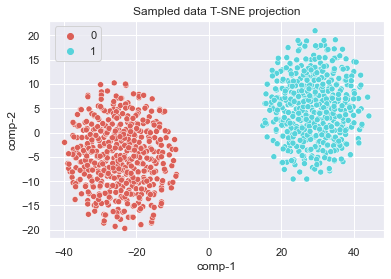

In [8]:
# TSNE
from sklearn.manifold import TSNE

x = data.iloc[:, :p_sim['n_features']]
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)
d = pd.DataFrame()
d["tt"] = data[['tt']].values.squeeze()
d["comp-1"] = z[:, 0]
d["comp-2"] = z[:, 1]

fig = plt.figure()
sns.scatterplot(x="comp-1", y="comp-2", hue=d.tt.tolist(),
            palette=sns.color_palette("hls", 2),
            data=d).set(title="Sampled data T-SNE projection")
fig.show()


In [9]:
# Tunning og hyperparameters

tunning = Tunning(p_sim)
p_survcaus_best = tunning.get_best_hyperparameter(n_trials=1)  #1000
p_survcaus_best

11:	[0s / 9s],		train_loss: 1.7154,	train_loss_surv: 1.7081,	train_loss_wass: 0.0016,	val_loss: 2.2497,	val_loss_surv: 2.2443,	val_loss_wass: 0.0012


100%|██████████| 200/200 [00:00<00:00, 507.70it/s]
[I 2021-11-02 14:44:49,913] Trial 0 finished with value: 0.04870567621740102 and parameters: {'num_durations': 24, 'encoded_features': 76, 'alpha_wass': 4.514035777946278, 'lr': 0.008444021478407119}. Best is trial 0 with value: 0.04870567621740102.


{'num_durations': 24,
 'encoded_features': 76,
 'alpha_wass': 4.514035777946278,
 'lr': 0.008444021478407119}

In [11]:
# Evaluation - benchmark

p_survcaus = p_survcaus_best.copy()

p_survcaus['patience'] = 4
p_survcaus['epochs']=20
p_survcaus['batch_size']=256


Ev = Evaluation(p_sim, p_survcaus)
Ev.All_Results(list_models=["SurvCaus", "SurvCaus_0",'CoxPH'],
               is_train=False)      # , 'CoxPH', 'BART'

SurvCaus
{'num_durations': 24, 'encoded_features': 76, 'alpha_wass': 4.514035777946278, 'lr': 0.008444021478407119, 'patience': 4, 'epochs': 20, 'batch_size': 256}
0:	[0s / 0s],		train_loss: 2.4427,	train_loss_surv: 2.4235,	train_loss_wass: 0.0042,	val_loss: 2.4048,	val_loss_surv: 2.3959,	val_loss_wass: 0.0020
1:	[0s / 1s],		train_loss: 2.3758,	train_loss_surv: 2.3659,	train_loss_wass: 0.0022,	val_loss: 2.3764,	val_loss_surv: 2.3675,	val_loss_wass: 0.0020
2:	[0s / 2s],		train_loss: 2.2123,	train_loss_surv: 2.2011,	train_loss_wass: 0.0025,	val_loss: 2.3623,	val_loss_surv: 2.3534,	val_loss_wass: 0.0020
3:	[0s / 3s],		train_loss: 2.1992,	train_loss_surv: 2.1890,	train_loss_wass: 0.0023,	val_loss: 2.3978,	val_loss_surv: 2.3908,	val_loss_wass: 0.0016
4:	[1s / 4s],		train_loss: 2.1613,	train_loss_surv: 2.1457,	train_loss_wass: 0.0035,	val_loss: 2.3338,	val_loss_surv: 2.3229,	val_loss_wass: 0.0024
5:	[1s / 6s],		train_loss: 2.1149,	train_loss_surv: 2.1012,	train_loss_wass: 0.0030,	val_loss: 2

 28%|██▊       | 57/200 [00:00<00:00, 561.67it/s]

11:	[0s / 9s],		train_loss: 1.8705,	train_loss_surv: 1.8606,	train_loss_wass: 0.0022,	val_loss: 2.3355,	val_loss_surv: 2.3310,	val_loss_wass: 0.0010


100%|██████████| 200/200 [00:00<00:00, 512.39it/s]


SurvCaus_0
{'num_durations': 24, 'encoded_features': 76, 'alpha_wass': 0.0, 'lr': 0.008444021478407119, 'patience': 4, 'epochs': 20, 'batch_size': 256}
0:	[0s / 0s],		train_loss: 2.4006,	train_loss_surv: 2.4006,	train_loss_wass: 0.0028,	val_loss: 2.4943,	val_loss_surv: 2.4943,	val_loss_wass: 0.0023
1:	[0s / 0s],		train_loss: 2.3163,	train_loss_surv: 2.3163,	train_loss_wass: 0.0032,	val_loss: 2.4735,	val_loss_surv: 2.4735,	val_loss_wass: 0.0021
2:	[0s / 1s],		train_loss: 2.1939,	train_loss_surv: 2.1939,	train_loss_wass: 0.0031,	val_loss: 2.4320,	val_loss_surv: 2.4320,	val_loss_wass: 0.0026
3:	[1s / 2s],		train_loss: 2.1529,	train_loss_surv: 2.1529,	train_loss_wass: 0.0040,	val_loss: 2.4242,	val_loss_surv: 2.4242,	val_loss_wass: 0.0034
4:	[1s / 4s],		train_loss: 2.1397,	train_loss_surv: 2.1397,	train_loss_wass: 0.0045,	val_loss: 2.3857,	val_loss_surv: 2.3857,	val_loss_wass: 0.0034
5:	[1s / 5s],		train_loss: 2.1277,	train_loss_surv: 2.1277,	train_loss_wass: 0.0045,	val_loss: 2.4049,	val_l

 22%|██▏       | 43/200 [00:00<00:00, 423.02it/s]

8:	[0s / 8s],		train_loss: 1.9539,	train_loss_surv: 1.9539,	train_loss_wass: 0.0037,	val_loss: 2.5400,	val_loss_surv: 2.5400,	val_loss_wass: 0.0029


100%|██████████| 200/200 [00:00<00:00, 468.42it/s]


CoxPH
Performing Newton-Raphson optimization
 * Iteration #1 - Loss = 1065.655 - ||grad||^2 = 297.90036
 * Iteration #2 - Loss = 1025.369 - ||grad||^2 = 266.16854
 * Iteration #3 - Loss = 998.168 - ||grad||^2 = 238.57818
 * Iteration #4 - Loss = 978.419 - ||grad||^2 = 214.21947
 * Iteration #5 - Loss = 963.474 - ||grad||^2 = 192.55258
 * Iteration #6 - Loss = 951.865 - ||grad||^2 = 173.19773
 * Iteration #7 - Loss = 942.688 - ||grad||^2 = 155.86198
 * Iteration #8 - Loss = 935.346 - ||grad||^2 = 140.30709
 * Iteration #9 - Loss = 929.422 - ||grad||^2 = 126.33292
 * Iteration #10 - Loss = 924.612 - ||grad||^2 = 113.76784
 * Iteration #11 - Loss = 920.691 - ||grad||^2 = 102.46262
 * Iteration #12 - Loss = 917.484 - ||grad||^2 = 92.28631
 * Iteration #13 - Loss = 914.856 - ||grad||^2 = 83.12319
 * Iteration #14 - Loss = 912.699 - ||grad||^2 = 74.87047
 * Iteration #15 - Loss = 910.929 - ||grad||^2 = 67.43655
 * Iteration #16 - Loss = 909.474 - ||grad||^2 = 60.73951
 * Iteration #17 - Loss

In [8]:

# Bilan of benchmark
Ev.bilan_benchmark


,models,Mise0,Mise1,CATE,PEHE
0,SurvCaus,"(0.034, 0.008)","(0.057, 0.01)","(0.079, 0.018)","(0.077, 0.071)"
1,SurvCaus_0,"(0.038, 0.024)","(0.049, 0.009)","(0.078, 0.023)","(0.077, 0.07)"
2,CoxPH,"(0.079, 0.058)","(0.053, 0.037)","(0.109, 0.067)","(0.134, 0.096)"


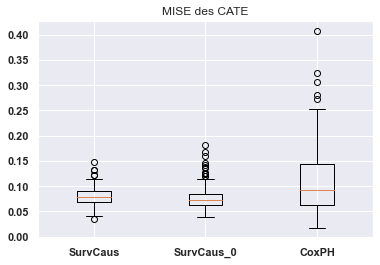

In [9]:
Ev.box_plot_cate

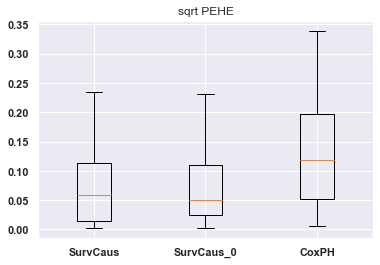

In [10]:
Ev.box_plot_pehe

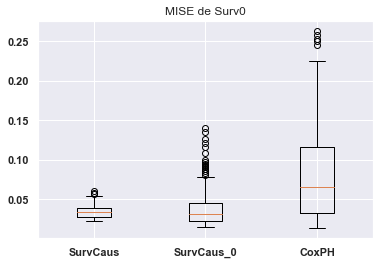

In [11]:
Ev.box_plot_surv0

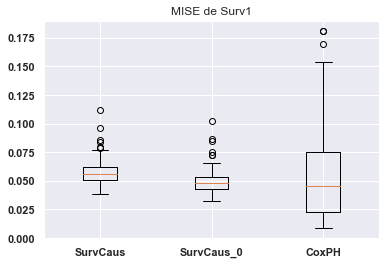

In [12]:
Ev.box_plot_surv1

(p_ours,p_bench) = (69, 101)
(p_ours,p_bench) = (69, 74)


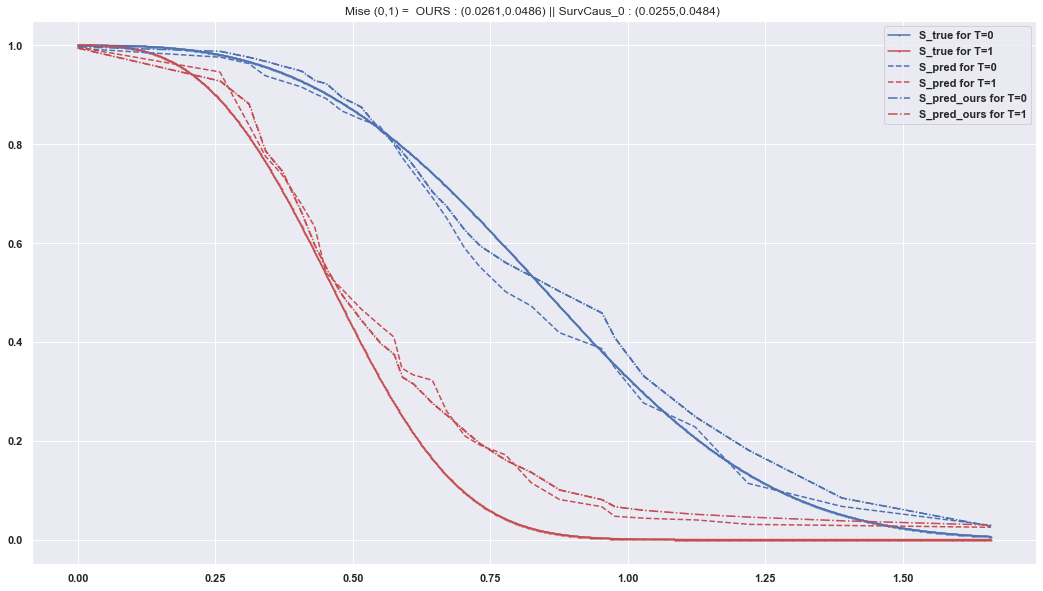

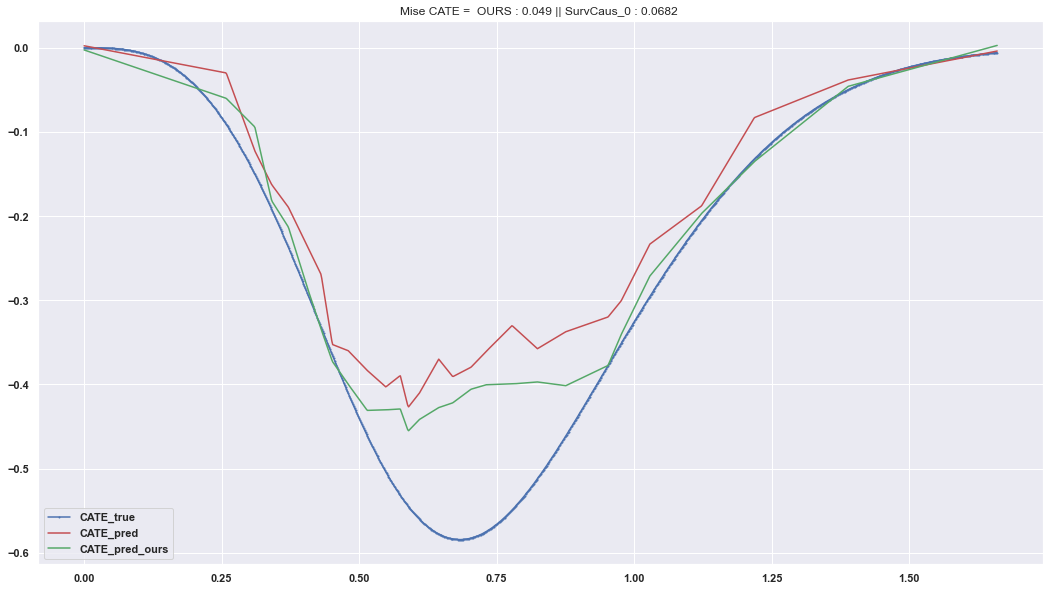

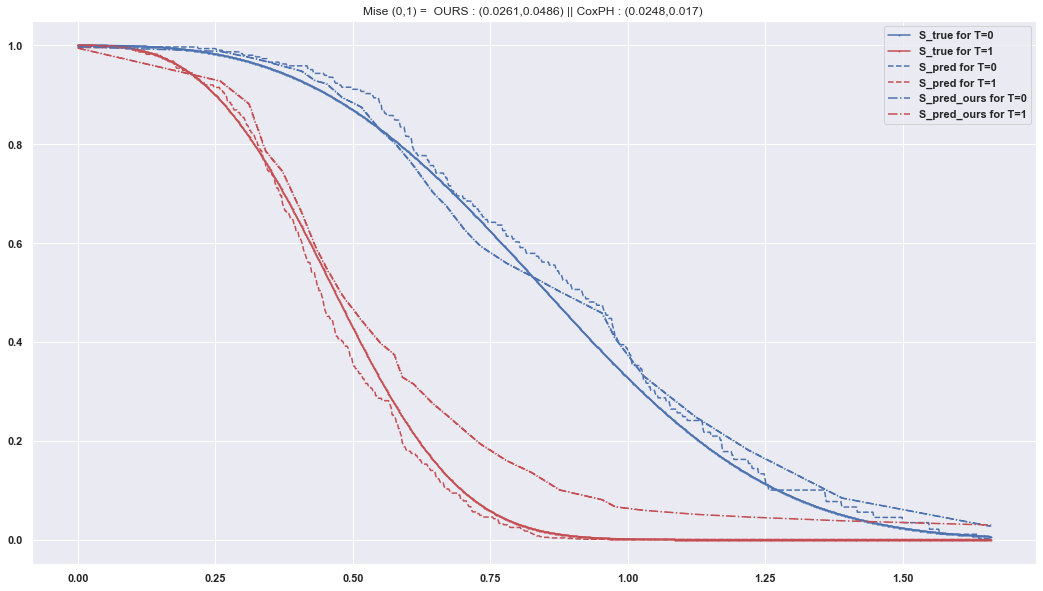

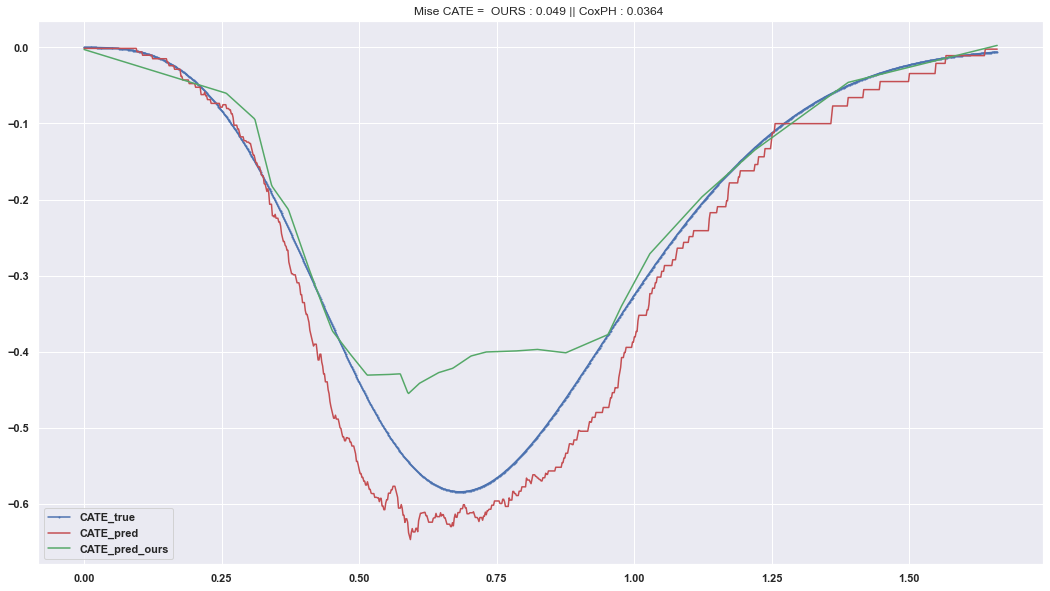

In [13]:

patient = 67
%matplotlib inline

for model_name in Ev.list_models[1:] :
    fig_surv,fig_cate = plots(patient, Ev.d_list_models, model_name)

